## DecisionTree classification algiorithm

In [17]:
#Importing modules to be used
from six import StringIO
from sklearn.metrics import accuracy_score
import pydotplus
import pandas as pd
import graphviz
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.datasets as datasets
from IPython.display import Image
import pydotplus
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [2]:
#reading in the data
data = pd.read_csv("Iris.csv")

In [3]:
iris_data = datasets.load_iris()

In [4]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
#getting the top 5 results from the iris dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Renaming column names
data.rename(columns = {'SepalLengthCm': 'SepalLength(cm)', 
                       'SepalWidthCm': 'SepalWidth(cm)',
                        'PetalLengthCm': 'PetalLength(cm)', 
                       'PetalWidthCm': 'PetalWidth(cm)'}, inplace=True)

In [8]:
#dropping the species column
data.drop(columns='Species', inplace=True)

In [9]:
data.head()

,Id,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm)
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [10]:
#predictor variable                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
X = data[['SepalLength(cm)', 'SepalWidth(cm)', 'PetalLength(cm)',
          'PetalWidth(cm)']]

In [11]:
#assigning the iris.target_names to the target variable
y = iris_data.target

In [12]:
#splitting the data into a ratio 70% of training data and 30% of testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [13]:
#hypertuning the model to get the best parameters for the decisionTree Classifier model
parameters = {'criterion': ['entropy', 'gini'], 'max_depth': range(0, 10, 2), 'min_samples_split': range(0, 10, 2)}
gs = GridSearchCV(DecisionTreeClassifier(), parameters)
gs.fit(X_train, y_train)

C:\Users\clinton\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\clinton\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\clinton\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\clinton\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(0, 10, 2),
                         'min_samples_split': range(0, 10, 2)})

In [15]:
#results of the best parameters given after the hypertuning of the model
gs.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}

In [14]:
#Building the model
dTree = DecisionTreeClassifier(criterion="entropy", max_depth=2, min_samples_split=2)
dTree.fit(X_train, y_train)
print('DecisionTree Classifier Created')

DecisionTree Classifier Created


In [23]:
y_pred = dTree.predict(X_test)
y_pred[0:20]

array([0, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1])

In [21]:
print('The accuracy for the DecisionTreeClassifier model is {} '.format(accuracy_score(y_test, y_pred)))

the accuracy for the DecisionTreeClassifier model is 0.8888888888888888 


In [24]:
dot_data = tree.export_graphviz(dTree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('iris')


'iris.pdf'

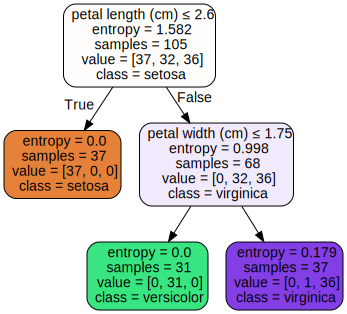

In [36]:
#Visualizing the DecisionTreeClassifier dendogram
dot_data = tree.export_graphviz(dTree, out_file=None,                       
                                feature_names= iris_data.feature_names,  
                                 class_names=iris_data.target_names,
                                filled=True, rounded=True,                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

> Note:  The aim of this project is to build a DecisionTreeClassifier model that can predict the right class when trained on any other testing data